In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from lab_processing import *

In [2]:
df = pd.read_csv('data/current-particles.tsv', sep='\t')
df.sort_values(by='current', inplace=True)

In [3]:
df['particles'] = df['particles_per_sec'] * 100

In [4]:
fon = df[:7]
base = df[7:]

In [5]:
sig_f = fon['particles_per_sec'] / np.sqrt(fon['particles'])
sig_I = 0.01 * np.ones(sig_f.size)

In [6]:
popt, pcov = np.polyfit(fon['current'], fon['particles_per_sec'], w=1/sig_f**2, deg=1, cov=True)
print_errors(popt, pcov)


    Final set of parameters             Asymptotic Standard Error
    =======================             =========================
    
    k1 = 0.0620257980709507		+/- 0.19511 (314.6%)
    k0 =  0.605073056273074		+/- 0.021051 (3.479%)



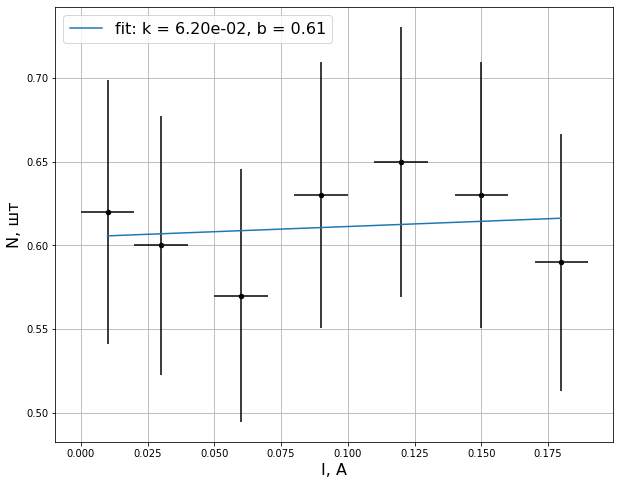

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(fon['current'], np.polyval(popt, fon['current']), label='fit: k = {:.2e}, b = {:.2f}'.format(*popt))
fon.plot(x='current', y='particles_per_sec', kind='scatter', xerr=sig_I, yerr=sig_f, color='k', ax=ax)

ax.legend(loc='upper left', fontsize=16)
ax.set_xlabel('I, A', fontsize=16)
ax.set_ylabel('N, шт', fontsize=16)
ax.grid()

In [8]:
base['particles_per_sec_clean'] = base['particles_per_sec'].copy() - popt[1]
sig_b = base['particles_per_sec_clean'].copy() / np.sqrt(base['particles'].copy())

<ipython-input-8-329dd4d0ea4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['particles_per_sec_clean'] = base['particles_per_sec'].copy() - popt[1]


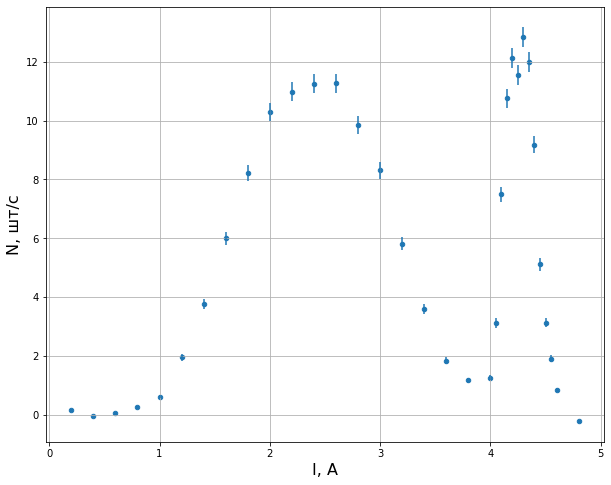

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
base.plot('current', 'particles_per_sec_clean', ax=ax, kind='scatter', yerr=sig_b)
ax.set_xlabel('I, A', fontsize=16)
ax.set_ylabel('N, шт/с', fontsize=16)
ax.grid()

In [10]:
popt, pcov = np.polyfit(base.iloc[19:-4]['current'], base.iloc[19:-4]['particles_per_sec_clean'], deg=2, cov=True)

In [11]:
print_errors(popt, pcov)


    Final set of parameters             Asymptotic Standard Error
    =======================             =========================
    
    k2 =  -185.181818181888		+/- 16.465 (8.891%)
    k1 =   1577.56212121272		+/- 139.15 (8.82%)
    k0 =  -3347.22246699693		+/- 293.71 (8.775%)



Text(0, 0.5, 'N, шт/с')

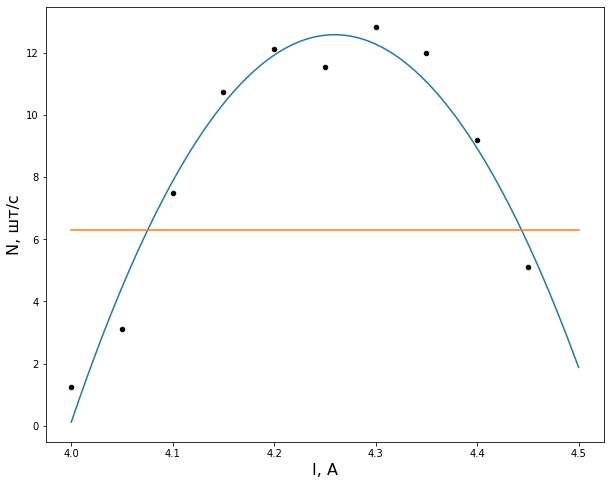

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
base[19:-4].plot('current', 'particles_per_sec_clean', ax=ax, color='k', kind='scatter')

x = np.linspace(4, 4.5, 300)
y = np.polyval(popt, x)
ax.plot(x, y)

y_max = y.max()
ax.plot(x, y_max/2*np.ones(x.size))

ax.set_xlabel('I, A', fontsize=16)
ax.set_ylabel('N, шт/с', fontsize=16)

In [13]:
roots_sig = np.roots(popt - np.array([0, 0, y_max/2]))
roots_i = np.roots(popt - np.array([0, 0, y_max]))
sig_i = np.absolute(roots_sig[1] - roots_sig[0])
i = roots_i[0]
i, sig_i

(4.259793020870455, 0.3686983870676972)

In [14]:
k = 1013.5 / i
sig_k = k * sig_i / i
k, sig_k

(237.92235797243015, 20.592922989918662)

In [15]:
base['pulse'] = base['current'].copy() * k
sig_p = base['pulse'] * np.sqrt((sig_k/k)**2 + (0.02/base['current'])**2)

<ipython-input-15-b3410229371e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['pulse'] = base['current'].copy() * k


In [16]:
base['y'] = np.sqrt(base['particles']) / base['pulse']
sig_y = base['y'] * np.sqrt(1/(4*base['particles']) + (sig_p / base['pulse'])**2)

<ipython-input-16-31d984a090ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['y'] = np.sqrt(base['particles']) / base['pulse']


In [17]:
me = 511
base['x'] = np.sqrt(base['pulse']**2 + me**2) - me
sig_x = base['x'] * sig_p / base['pulse']

<ipython-input-17-b471119a8ca6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['x'] = np.sqrt(base['pulse']**2 + me**2) - me


<AxesSubplot:xlabel='x', ylabel='y'>

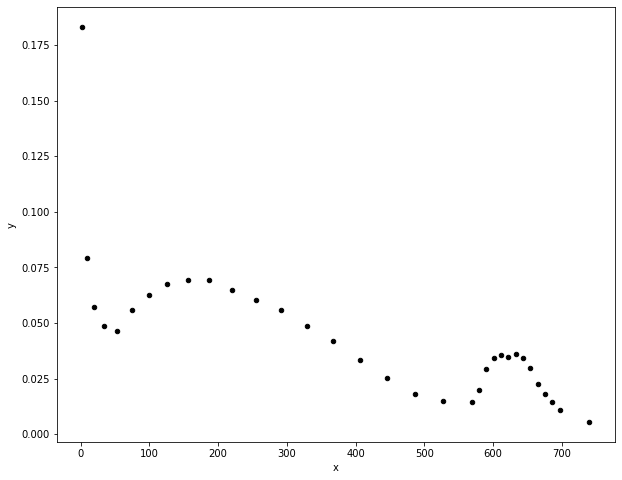

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
base.plot('x', 'y', ax=ax, kind='scatter', color='k')

In [19]:
x = base['x'][9:18]
y = base['y'][9:18]

In [20]:
popt, pcov = np.polyfit(x, y, deg=1, cov=True)
print_errors(popt, pcov)


    Final set of parameters             Asymptotic Standard Error
    =======================             =========================
    
    k1 = -0.000174609415602837		+/- 5.6055e-06 (3.21%)
    k0 =  0.104380624090817		+/- 0.0019385 (1.857%)



<AxesSubplot:xlabel='x', ylabel='y'>

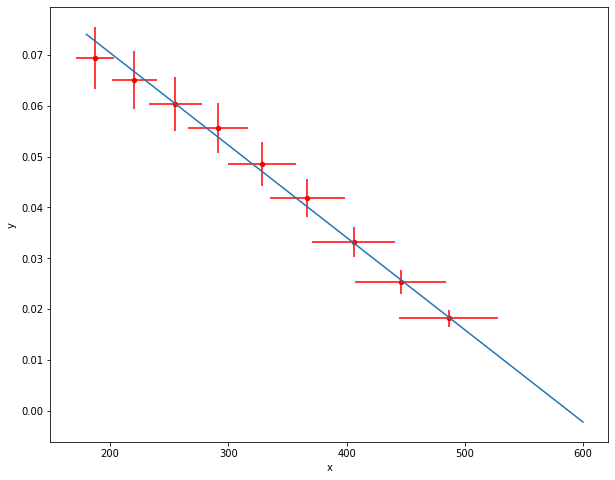

In [39]:
fig, ax = plt.subplots(figsize=(10, 8))
xl = np.linspace(180, 600, 10)
# ax.plot(xl, np.polyval(popt, xl), label='MNK')
ax.plot(xl, np.polyval(res.x, xl), label='fit: k={:.2e}, b={:.3f}'.format(*res.x))
# ax.plot(xl, np.polyval(res1.x, xl), label='CHI x only')
base[9:18].plot('x', 'y', ax=ax, kind='scatter', color='r', xerr=sig_x, yerr=sig_y)



In [ ]:
# точки графика и их ошибки
print('x, x_sig')
print(np.vstack([x, x_sig]).T)

print('y, y_sig')
print(np.vstack([y, y_sig]).T)

$$ \sum_{i=1}^n \left[ \left( \dfrac{x_i - \hat{x}_i}{\sigma_{x_i}} \right)^2 + \left( \dfrac{y_i - \hat{y}_i}{\sigma_{y_i}} \right)^2 \right] $$

In [29]:
def error_func(coeffs):
    k, b = coeffs
    bi = y + x / k
    return np.sum(((x - (bi - b)*k/(k**2 + 1))/x_sig)**2 + ((y - (bi*k**2 + b)/(k**2 + 1))/y_sig)**2)

In [30]:
from scipy.optimize import minimize

In [31]:
x = base['x'][9:18].copy()
y = base['y'][9:18].copy()
x_sig = sig_x[9:18].copy()
y_sig = sig_y[9:18].copy()
res = minimize(error_func, x0=[0.1, 0.1], method='Nelder-Mead')
res

 final_simplex: (array([[-0.00018153,  0.10673021],
       [-0.00018163,  0.10678532],
       [-0.00018167,  0.1067897 ]]), array([0.91080202, 0.91083102, 0.91084272]))
           fun: 0.9108020163724319
       message: 'Optimization terminated successfully.'
          nfev: 95
           nit: 51
        status: 0
       success: True
             x: array([-0.00018153,  0.10673021])

In [32]:
from scipy.optimize import curve_fit

In [43]:
def f(x, m, Tmax):
    return np.sqrt(((Tmax - x)/3e10)**2 + 2*m*(Tmax - x))

In [44]:
popt, pcov = curve_fit(f, x, y, p0=[0, 600])

In [45]:
popt

array([7.14598092e-06, 5.02472499e+02])

In [36]:
print_errors(popt, pcov)


    Final set of parameters             Asymptotic Standard Error
    =======================             =========================
    
    k1 = 7.14598092314917e-06		+/- 3.4485e-07 (4.826%)
    k0 =   502.472499051843		+/- 5.4856 (1.092%)

